In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
colors = ["blue", "red", "green"]
df = DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

In [3]:
df.sample(n=5) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
144,6.7,3.3,5.7,2.5,2.0
95,5.7,3.0,4.2,1.2,1.0
121,5.6,2.8,4.9,2.0,2.0
53,5.5,2.3,4.0,1.3,1.0
3,4.6,3.1,1.5,0.2,0.0


In [4]:
target_mapping = {
    0: iris["target_names"][0],
    1: iris["target_names"][1],
    2: iris["target_names"][2],
}

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[target]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[target]'>]],
      dtype=object)

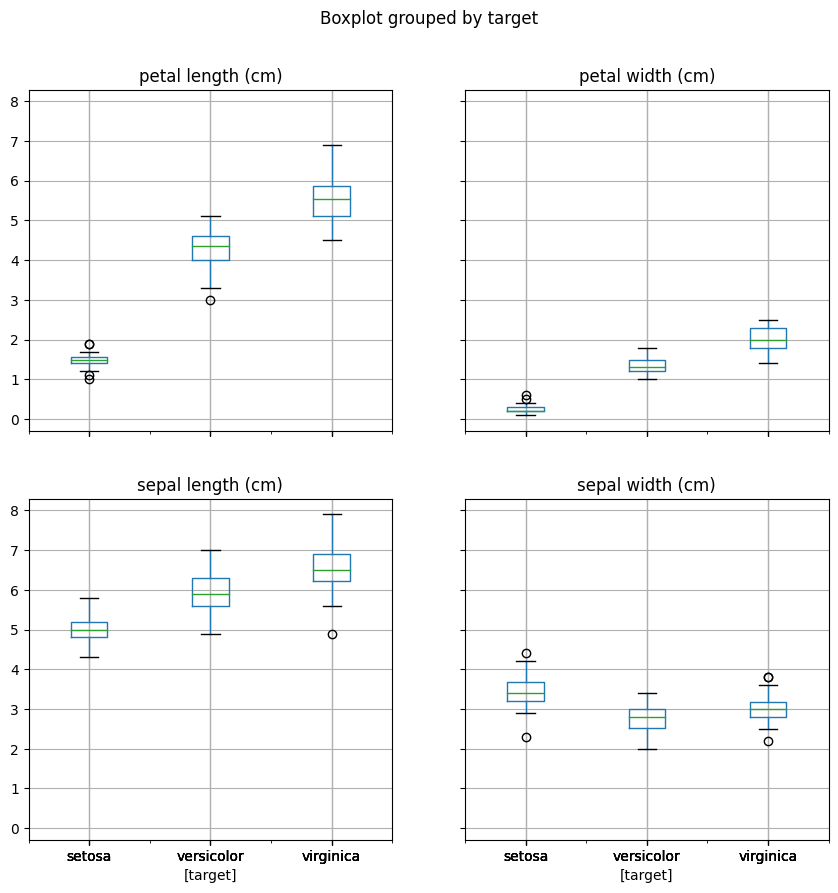

In [5]:
df["target"] = df["target"].map(target_mapping)
X = df[iris["feature_names"]].to_numpy()
labels = df[["target"]].to_numpy()
df.boxplot(by="target", layout=(2, 2), figsize=(10, 10))

In [6]:
plt.savefig("boxplot.png")

X = StandardScaler().fit_transform(X)

cov = (X.T @ X) / (X.shape[0] - 1)

eig_values, eig_vectors = np.linalg.eig(cov)

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_83867/2565485512.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

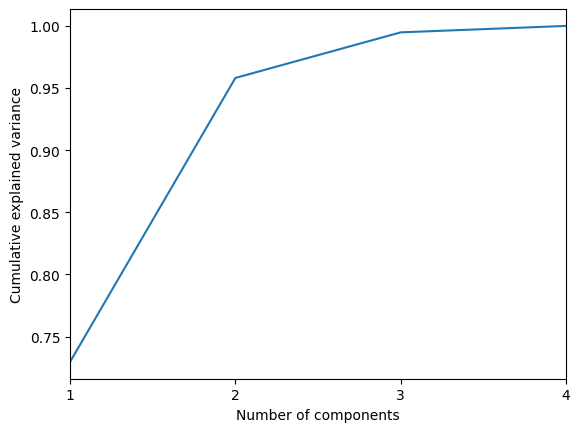

In [7]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.clf()
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [10]:
eig_scores = np.dot(X, sorted_eig_vectors[:, :2])
plt.clf()

<Figure size 640x480 with 0 Axes>

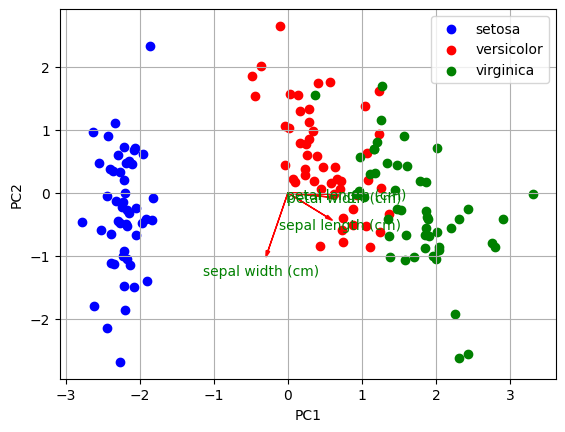

In [17]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(iris["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
biplot(eig_scores, sorted_eig_vectors, iris["feature_names"])
plt.legend()

In [19]:
plt.savefig("biplot_eig.png")
u, s, vh = np.linalg.svd(X)
print("U:\n", u)
print("S:\n", np.diag(s))
print("V^T:\n", vh)

U:
 [[-1.08239531e-01 -4.09957970e-02  2.72186462e-02 ...  5.43380310e-02
   1.96438400e-03  2.46978090e-03]
 [-9.94577561e-02  5.75731483e-02  5.00034005e-02 ...  5.12936114e-03
   8.48544595e-02  5.83496936e-03]
 [-1.12996303e-01  2.92000319e-02 -9.42089147e-03 ...  2.75184277e-02
   1.78604309e-01  1.49419118e-01]
 ...
 [ 7.27030413e-02 -2.29793601e-02 -3.84023516e-02 ...  9.89532683e-01
  -1.25488246e-02 -7.17729676e-04]
 [ 6.56112167e-02 -8.63643414e-02 -1.98939364e-01 ... -1.41206665e-02
   9.52049996e-01 -2.32048811e-02]
 [ 4.59137323e-02  2.07800179e-03 -1.12588405e-01 ... -8.30595907e-04
  -2.19201906e-02  9.77300244e-01]]
S:
 [[20.92306556  0.          0.          0.        ]
 [ 0.         11.7091661   0.          0.        ]
 [ 0.          0.          4.69185798  0.        ]
 [ 0.          0.          0.          1.76273239]]
V^T:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63

<Figure size 640x480 with 0 Axes>

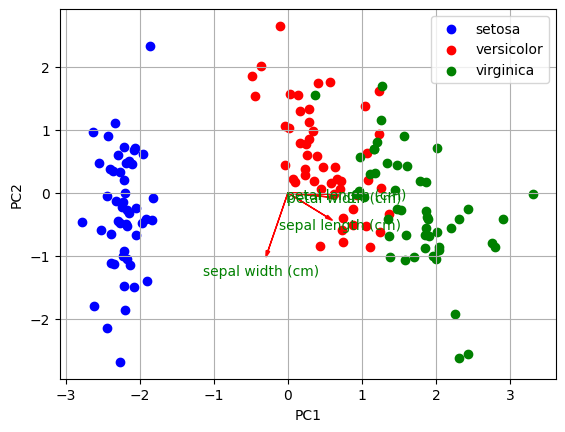

In [21]:
svd_scores = np.dot(X, vh.T[:, :2])
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
biplot(svd_scores, vh.T, iris["feature_names"])
plt.legend()

In [22]:
svd_scores

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,